Title: Images as Arrays
Author: Thomas Breuel
Institution: UniKL

In [2]:

from pylab import *
from scipy.ndimage import filters
def grayshow(image,*args,**kw): 
    clf(); gray(); imshow(image,interpolation='nearest',*args,**kw); 
    savefig("temp.png")
def gradshow(image,*args,**kw): 
    m = max(abs(amax(image)),abs(amin(image)))
    clf();gray(); imshow(image,interpolation='nearest',cmap=cm.PuOr,vmin=-m,vmax=m,*args,**kw); 
    savefig("temp.png") 
def colshow(image,*args,**kw): 
    assert image.ndim==3 
    clf(); gray(); imshow(image,interpolation='nearest',*args,**kw); 
    savefig("temp.png")
def imrow(*args,**kw): 
    clf()
    n = len(args) 
    for i,image in enumerate(args): 
        subplot(1,n,i+1) 
        imshow(args[i],interpolation='nearest',cmap=cm.gray,**kw) 
    savefig("temp.png") 
from IPython.core.display import Image
def figs(*args):
    for i,f in enumerate(args):
        subplot(1,len(args),i+1)
        axis("off")
        imshow(imread("Figures-intro/"+f+".png"))

# Grayscale and RGB Images

(RGB Images)

- images on computers are usually represented in RGB format
- each pixel contains a value for "red", "green", "blue"
- each of these values tells a monitor how bright the corresponding pixel is supposed to be
- different combinations of RGB values achieve a wide range of different colors



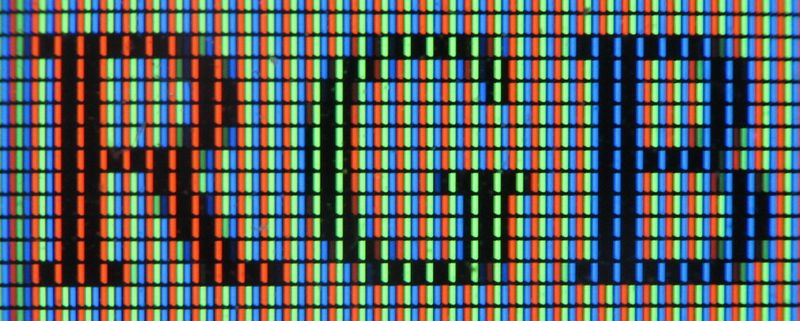

In [3]:
## RGB images up close
figsize(6,4)
fig(filename="Figures-intro/rgb-color-display.png")

(Images as Arrays)

- usually, we represent images as arrays
- color images are rank-3 arrays
- they take 3 subscripts: row, column and color channel
- there are three color channels, one for red, green, and blue
- grayscale images are rank-2 arrays


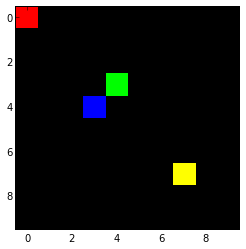

In [1]:
# RGB images
image = zeros((10,10,3))
image[0,0,:] = (1.0,0.0,0.0)
image[3,4,:] = (0.0,1.0,0.0)
image[4,3,:] = (0.0,0.0,1.0)
image[7,7,:] = (1.0,1.0,0.0)
imshow(image,interpolation='nearest')

Another common image type are grayscale images.



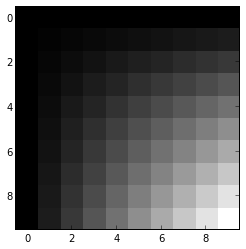

In [11]:
# grayscale image
image = outer(linspace(0,1,10),linspace(0,1,10))
imshow(image,interpolation='nearest',cmap=cm.gray)

# Image Loading, Saving, and Display

Images are most easily loaded using Pylab's `imread` function.
(However, `imread` doesn't have much control over how images are loaded,
and it doesn't work well for some image types, so for other applications,
you may have to use one of the other image loading libraries.)

Images are displayed with the `imshow` function. It has a lot of options for
defining how images should be show.



[ 0.05882353  0.05882353  0.05882353]


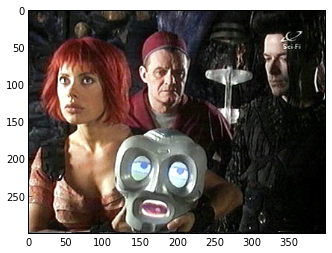

In [5]:
# imread / imshow
#:h:1.5
image = imread("lexx.png") 
imshow(image) 
print image[0,0]

(grayscale image display)

For grayscale images, the gray values may be mapped into colors for better visibility.
This is called _pseudocolor_ and is implemented using a _color map_.
The default color map in Python is not gray, but something that runs through a range
of cold through hot colors.

In addition, images are usually scaled and may be displayed with or without interpolation.
When an image is scaled for display, each pixel in the image may correspond to multiple
pixels on the display.

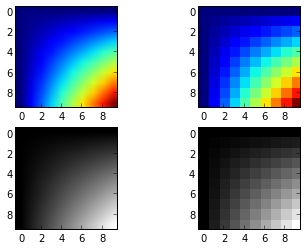

In [7]:
# imshow options
image = outer(linspace(0,1,10),linspace(0,1,10))
subplot(221); imshow(image)
subplot(222); imshow(image,interpolation='nearest')
subplot(223); imshow(image,cmap=cm.gray)
subplot(224); imshow(image,interpolation='nearest',cmap=cm.gray)

Note that the functions `grayshow` (show a grayscale image), `gradshow` (show a gradient image), 
`colshow` (show a color image), and `imrow` (show a row of images) are not standard. 

The standard display function is `imshow`; these other functions are simple wrappers around it (defined in the header of this worksheet). You should be able to define them easily yourself.

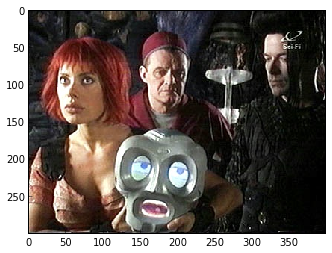

In [11]:
image = imread("lexx.png") 
colshow(image) 

The _shape_ of an image is just an attribute.
Its length is the number of dimensions, also available under the `ndim` attribute.
The `size` is the total number of elements.



In [12]:
print image.shape 
print image.ndim,len(image.shape)
print image.size

(300, 399, 3)
3 3
359100


The _minimum_ and _maximum_ of each image is an important image property,
among other things because it interacts with displaying the image.
You can check these with `amin` and `amax`.

Note that there are also `min`, `minimum`, `max`, and `maximum` functions
that do something different.



In [13]:
amin(image),amax(image)

(0.0, 1.0)

Subscripting works as it does with regular numerical arrays.



In [24]:
image[:2,:2,0] 

array([[ 0.05882353,  0.04705882],
       [ 0.05490196,  0.05098039]], dtype=float32)

# Simple Array Operations on Images

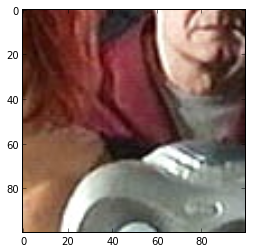

In [5]:
# array subscripting with ranges
imshow(image[100:200,100:200,:])

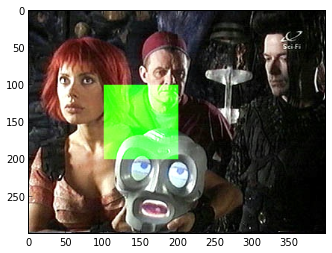

In [7]:
# assigning to a subscript range
image2 = image.copy()
image2[100:200,100:200,1:2] = 1.0
imshow(image2)

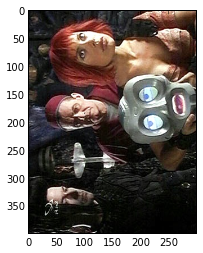

In [8]:
# transposing the first two axes
imshow(transpose(image,axes=[1,0,2]))

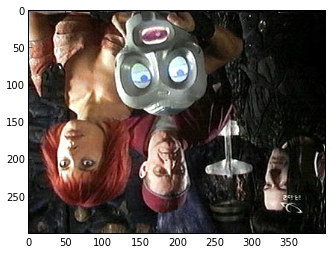

In [9]:
# reversing the first axis
imshow(image[::-1,:,:])

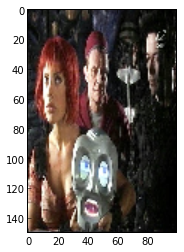

In [10]:
# subsampling the first two axes
imshow(image[::2,::4,:])

# Image Channels

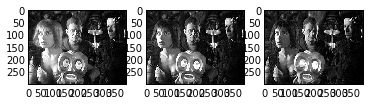

In [16]:
# image channels
imrow(image[:,:,0],image[:,:,1],image[:,:,2]) 

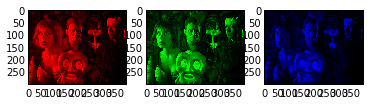

In [17]:
# image channels in color
imrow(array([1,0,0])[newaxis,newaxis,:]*image,
      array([0,1,0])[newaxis,newaxis,:]*image,
      array([0,0,1])[newaxis,newaxis,:]*image) 

# Simple Color Space Transformations

Conversion to grayscale.  In fact, this weights the different channels equally.  To get a more natural transformation, it may be better to give more weight to the green channel.



In [13]:
grayshow(mean(image,axis=2)) 

Gamma correction changes the contrast of the image.



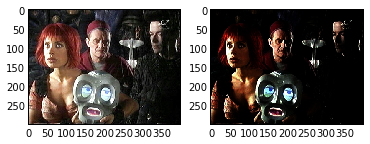

In [14]:
# gamma correction
imrow(image,image**3) 

In [19]:
# gamma correction
imrow(image,image**.3) 

Thresholding results in a hard cutoff.



In [17]:
# color thresholding
imrow(image,image>0.5) 

It's a little easier to understand the effect of thresholding in grayscale.



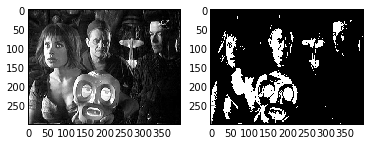

In [18]:
# grayscale thresholding
imrow(mean(image,axis=2),mean(image,axis=2)>0.5) 

Quantization is a generalization of thresholding.  Quantization is also what analog-to-digital converters perform.



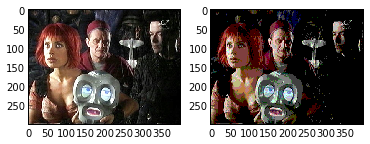

In [20]:
# color quantization
imrow(image,floor(4*image)/4.0) 

The HSV (hue, saturation, value) space separates out the intensity of an image from the color values. This is a popular color space in computer graphics, although it isn't very well defined. We can illustrate this by normalizing the V value to 1.0 and keeping the color values the same.



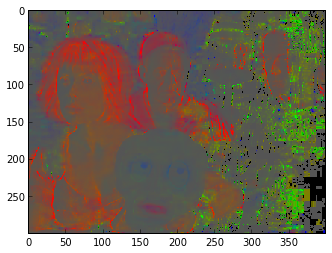

In [21]:
# value normalization in HSV
colshow(image/maximum(0.01,maximum(0.01,sum(image,axis=2))[:,:,newaxis])) 

# Arbitrary Subscripting and Geometric Transformations

(generalized subscripting)

Python supports general subscripting operations.

When you write something like:

`z = a[x]`

what that means is:

- construct an output `z` that has the same shape as `x`
- for each element `i` of `x`, compute `a[i]` and put it into `z`

This generalizes to multiple subscripts:

`z = a[x,y]`

Here, `x` and `y` must have the same shape.

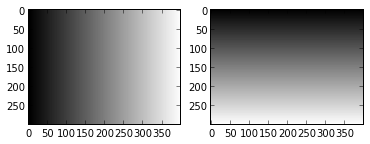

In [16]:
# constructing a coordinate array
xs,ys = meshgrid(range(image.shape[1]),range(image.shape[0])) 
imrow(xs,ys) 

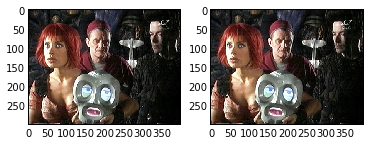

In [17]:
# identity subscripting
imrow(image,image[ys,xs,:]) 

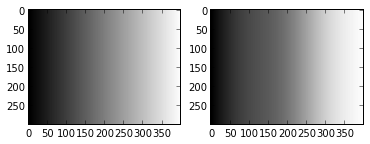

In [18]:
# making a warped coordinate array
xsn = xs*1.0/amax(xs) 
xs1 = xsn+0.05*sin(xsn*10.0) 
xs1 = (xs1+amin(xs1))/(amax(xs1)-amin(xs1)) 
xs1 = array(xs1*amax(xs),'i') 
imrow(xs,xs1)

In [19]:
# warping the image by subscripting
imrow(image,image[ys,xs1,:]) 

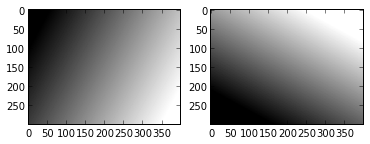

In [22]:
# constructing rotated coordinates
alpha = 0.5 
xc = amax(xs)/2 
yc = amax(ys)/2 

xr = cos(alpha)*(xs-xc) + sin(alpha)*(ys-yc) + xc
yr = sin(alpha)*(xs-xc) - cos(alpha)*(ys-yc) + yc

xr = array(clip(xr,0,amax(xs)),'i') # convert to int
yr = array(clip(yr,0,amax(ys)),'i') # and clip to valid range
imrow(xr,yr) 

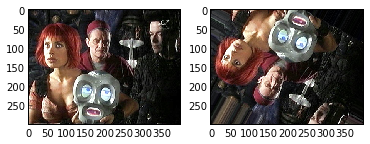

In [23]:
# rotating the image with rotated coordinates
imrow(image,image[yr,xr,:]) 

# Image Blending

(alpha channels and blending)

Blending and alpha channels are very common operations in computer graphics, because they allow images to be composed smoothly and nicely. The mathematics underlying it is pretty simple.

Blending images $U$ and $V$ with a factor $\alpha\in[0,1]$,

$$O = \alpha\cdot U + (1-\alpha)\cdot V$$

We can also do this pixel-wise:

$$O(x,y) = \alpha(x,y)\cdot U(x,y) + (1-\alpha(x,y))\cdot V(x,y)$$

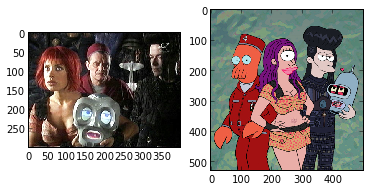

In [22]:
# two images to be blended
image = imread("lexx.png")
image2 = imread("lexx2.png") 
imrow(image,image2) 

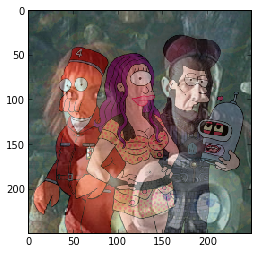

In [23]:
# global blending
image = image[:250,:250,:] 
image2 = image2[:500:2,:500:2,:] 
blend = 0.5*image + 0.5*image2 
colshow(blend) 

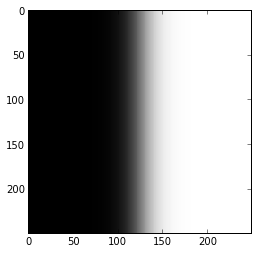

In [24]:
# constructing an alpha mask
def sigmoid(x): return 1.0/(1.0+exp(-x)) 
xs,ys = meshgrid(range(250),range(250)) 
blender = sigmoid(0.1*(xs-125)) 
grayshow(blender) 

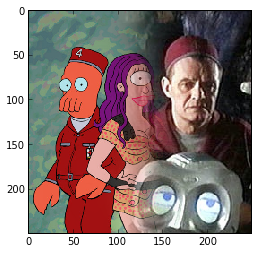

In [25]:
# blending with a mask
colshow(blender[:,:,newaxis]*image+(1.0-blender[:,:,newaxis])*image2) 

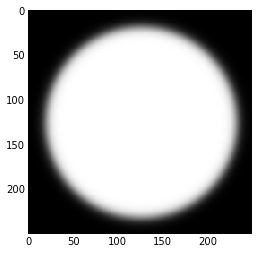

In [27]:
# a vignette 
xs,ys = meshgrid(range(250),range(250)) 
blender = sigmoid(32-0.3*(sqrt((xs-125)**2+(ys-125)**2))) 
grayshow(blender) 

In [28]:
# applying a vignette
colshow(blender[:,:,newaxis]*image+(1.0-blender[:,:,newaxis])*zeros(image.shape)) 